In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from pycbc.types import TimeSeries
from calcwf import gen_wf, shifted_e

In [3]:
# Load in seobnrpe waveform
raw_wf_data = np.loadtxt('data/seobnrpe_waveform.txt', delimiter=',').T

# Find start time
dt = np.mean(np.diff(raw_wf_data[0]))
current_start_ind = np.max(np.where(raw_wf_data[1] == 0))+1
start_time = dt*(-len(raw_wf_data[0])+current_start_ind)

# Create pycbc timeseries object and roll to correct start point
wf = TimeSeries(raw_wf_data[1]-1j*raw_wf_data[2], dt, epoch=start_time)
wf.roll(-current_start_ind)

In [10]:
# Perform qtransform
wf_q_times, wf_q_freqs, wf_q_plane = wf.real().qtransform(1/2048, logfsteps=1000, qrange=(50,50), frange=(10, 100))
wf_q_amp = wf_q_plane**0.5

# Normalise amplitude at each freq
wf_q_amp = (wf_q_amp.T / np.max(wf_q_amp, axis=1)).T

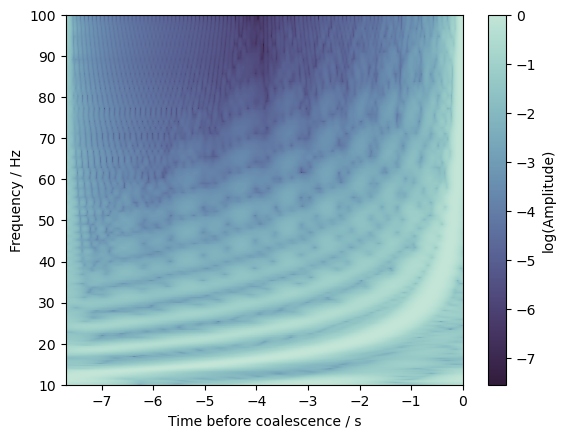

In [20]:
# Make qtransform plot
cmap = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
plt.pcolormesh(wf_q_times, wf_q_freqs, np.log10(wf_q_amp), cmap=cmap)
plt.colorbar(label='log(Amplitude)')

# Plot formatting
plt.ylim(10,100)
plt.xlim(wf.sample_times[0], 0)
plt.xlabel('Time before coalescence / s')
plt.ylabel('Frequency / Hz')
plt.savefig('Figures/seobnrpe_qtransform.png', dpi=450)

Compare to equivalent teobresums waveform (i.e. only eccentric):

Note that this ignores the fact that the waveform models have different eccentricity definitions (which should be taken into account).

In [16]:
# Generate waveform with equivalent parameters
m1 = 20
m2 = 15
M = m1+m2
q = m1/m2
distance = 100
inclination = np.pi/2
phase = np.pi/2
ecc = 0.5
f_ref = 10
f_low = 5
sample_rate = 4096
h = gen_wf(f_low, shifted_e(f_low, f_ref, ecc), M, q, sample_rate, 'TEOBResumS', phase=phase, distance=distance, inclination=inclination)

# Set equivalent start time
if h.sample_times[-1] < wf.sample_times[-1]:
    h.append_zeros(int((wf.sample_times[-1]-h.sample_times[-1])*sample_rate*2))
h = h.time_slice(*wf.sample_times[[0, -1]])

In [17]:
# Perform qtransform
h_q_times, h_q_freqs, h_q_plane = h.real().qtransform(1/2048, logfsteps=1000, qrange=(50,50), frange=(10, 100))
h_q_amp = h_q_plane**0.5

# Normalise amplitude at each freq
h_q_amp = (h_q_amp.T / np.max(h_q_amp, axis=1)).T

Text(0, 0.5, 'Frequency / Hz')

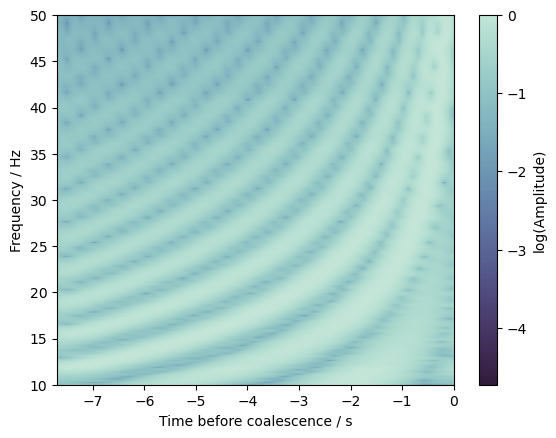

In [18]:
# Make qtransform plot
cmap = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
plt.pcolormesh(h_q_times, h_q_freqs, np.log10(h_q_amp), cmap=cmap)
plt.colorbar(label='log(Amplitude)')

# Plot formatting
plt.ylim(10,50)
plt.xlim(h.sample_times[0], 0)
plt.xlabel('Time before coalescence / s')
plt.ylabel('Frequency / Hz')